# Bike Sharing Assignment

### Input as given in the case study

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

### Business Objectives

 The business goal is to create a demand prediction model for shared bikes using various independent variables. This model will help management understand how demand changes with different factors, enabling them to adapt their business strategy to meet customer expectations and evaluate demand dynamics in new markets.

### Importing Required Libraries

In [544]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
warnings.filterwarnings('ignore')
sns.set(rc={'figure.figsize':(5.7,5.27)})

### Step 1: Reading and Understanding the Data,

#### 1.1  Reading the dataset

In [545]:
bike_rent_dt=pd.read_csv("day.csv")

#### 1.2  Getting Dataset Info

In [546]:
bike_rent_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


Here we can see that we have 730 rows and 16 coloumns

#### 1.2  Describing the dataset 

In [547]:
bike_rent_dt.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


From this data we can already see that some of the rows are a categorical data which we can treat in the cleaning section 

Having a deeper look at the dataset to identify some early correlations 

###  Step 2 Cleaning the Dataset 

#### 2.1 Dropping the non-required rows according to the use case following the data dictionay 

In [548]:
# Droping casual and registered as some of these represent the target variable cnt
bike_rent_dt.drop(['casual','registered'],axis=1,inplace=True)

In [549]:
bike_rent_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  cnt         730 non-null    int64  
dtypes: float64(4), int64(9), object(1)
memory usage: 80.0+ KB


Now we have 14 rows

In [550]:
# Dropping dteday as data represented by it can also be represented by mnth and yr
bike_rent_dt.drop(['dteday'],axis=1,inplace=True)

In [551]:
bike_rent_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  cnt         730 non-null    int64  
dtypes: float64(4), int64(9)
memory usage: 74.3 KB


#### 2.2 Encoding the categorical values

In [552]:
bike_rent_dt.mnth.value_counts()

1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64

In [553]:
bike_rent_dt.mnth = bike_rent_dt.mnth.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

In [554]:
bike_rent_dt.weekday.value_counts()

6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: weekday, dtype: int64

In [555]:
bike_rent_dt.weekday = bike_rent_dt.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

In [556]:
bike_rent_dt.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [557]:
bike_rent_dt.season = bike_rent_dt.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [558]:
bike_rent_dt.season.value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [559]:
bike_rent_dt.yr.value_counts()

0    365
1    365
Name: yr, dtype: int64

In [560]:
bike_rent_dt.yr = bike_rent_dt.yr.map({0:'2018', 1:'2019'})

In [561]:
bike_rent_dt.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [562]:
bike_rent_dt.weathersit = bike_rent_dt.weathersit.map({1:'Clear',2:'Misty_Cloudy',3:'Light_Snow',4:'Heavy_Rain'})

In [563]:
bike_rent_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   season      730 non-null    object 
 2   yr          730 non-null    object 
 3   mnth        730 non-null    object 
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    object 
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    object 
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 74.3+ KB


In [564]:
bike_rent_dt.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,spring,2018,Jan,0,Sat,0,Misty_Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,2,spring,2018,Jan,0,Sun,0,Misty_Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,3,spring,2018,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,4,spring,2018,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,5,spring,2018,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


We have now cleaned all the categorical variables now lets do univariate analysis

###  Univariate Analysis

<Axes: >

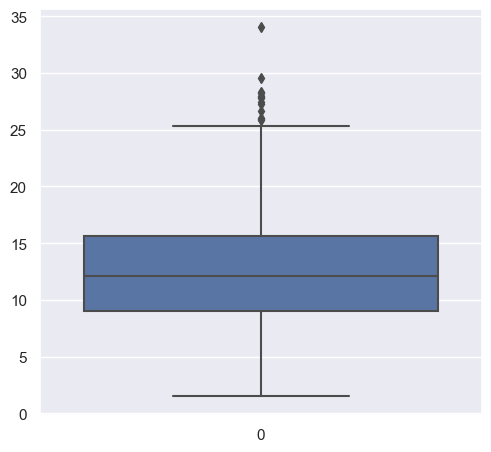

In [565]:
sns.boxplot(bike_rent_dt['windspeed'])

We have some outliers in the windspeed dataset but looks uniformally distributed 

<Axes: >

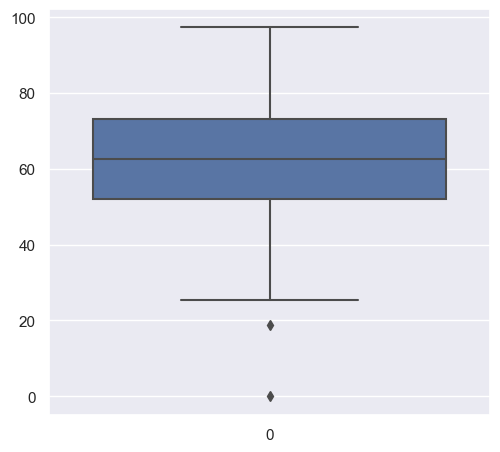

In [566]:
sns.boxplot(bike_rent_dt['hum'])

Humidity dataset also looks nicely distributed without a large number of outliers 

<Axes: >

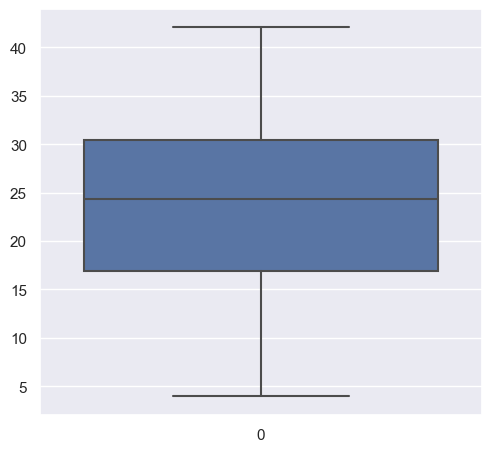

In [567]:
sns.boxplot(bike_rent_dt['atemp'])

atemp dataset also looks nicely distributed without a large number of outliers 

<Axes: >

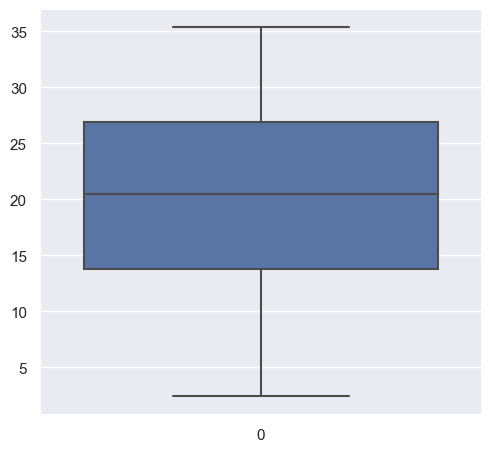

In [568]:
sns.boxplot(bike_rent_dt['temp'])

temp dataset also looks nicely distributed without a large number of outliers 

#### All of the datasets have a very low number of outliers

###  Bivariate Analysis

<Axes: xlabel='season', ylabel='cnt'>

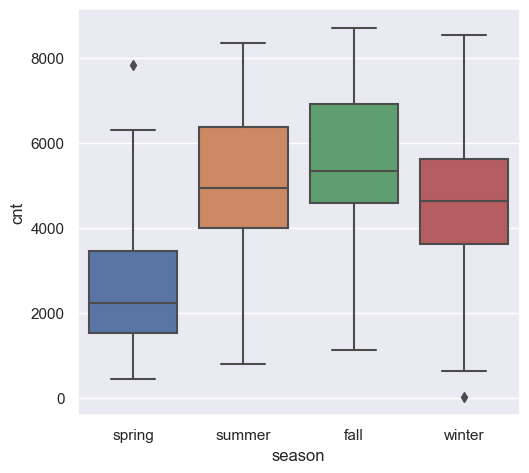

In [569]:
sns.boxplot(x = 'season', y = 'cnt', data = bike_rent_dt)

We see a high number of rentals in the fall and the summer season

<Axes: xlabel='mnth', ylabel='cnt'>

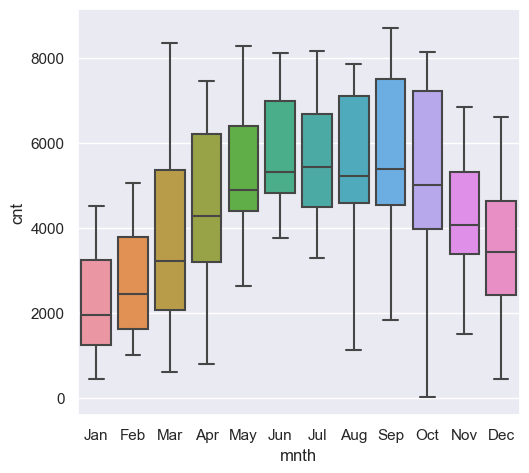

In [570]:
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_rent_dt)

We see the bike demand incresing from the month of Apr and descresing from aug till dec , also seems some corealation with seasons

<Axes: xlabel='weekday', ylabel='cnt'>

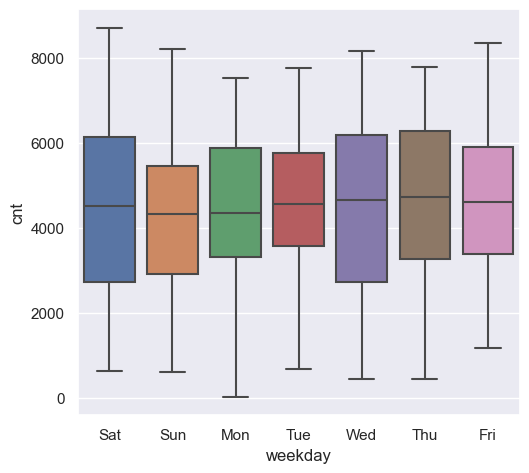

In [571]:
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_rent_dt)

<Axes: xlabel='yr', ylabel='cnt'>

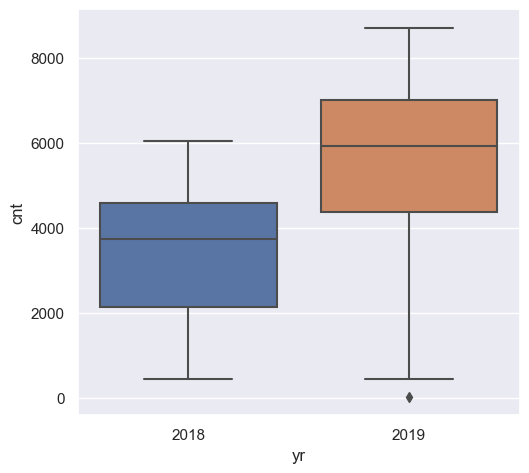

In [572]:
sns.boxplot(x = 'yr', y = 'cnt', data = bike_rent_dt)

We see a increasing trend in the bussiness in 2019 which seems to be good sign

<Axes: xlabel='weathersit', ylabel='cnt'>

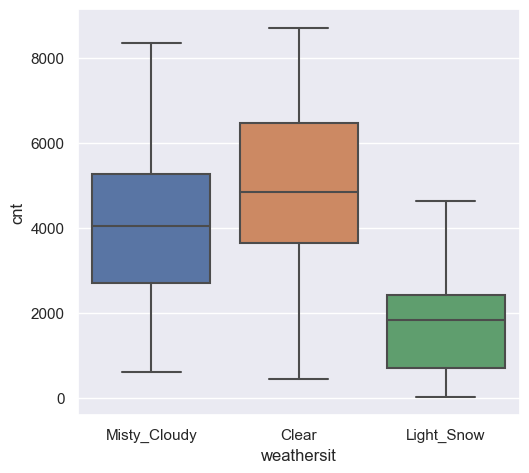

In [573]:
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_rent_dt)

From the above graph we can conclude that the most demand is the clear season 

<Axes: xlabel='holiday', ylabel='cnt'>

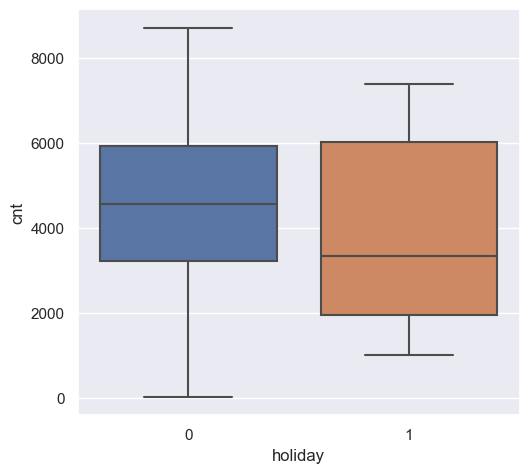

In [574]:
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_rent_dt)

<Axes: xlabel='workingday', ylabel='cnt'>

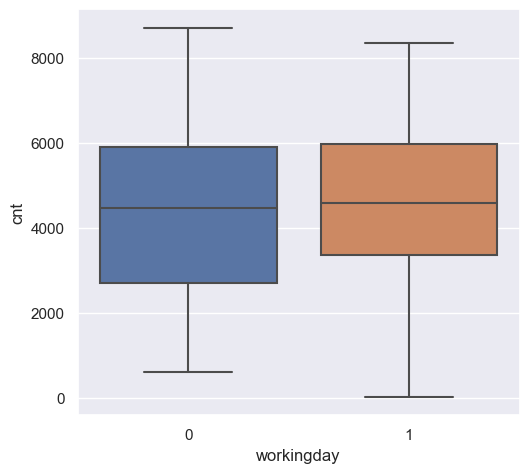

In [575]:
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_rent_dt)

<Axes: >

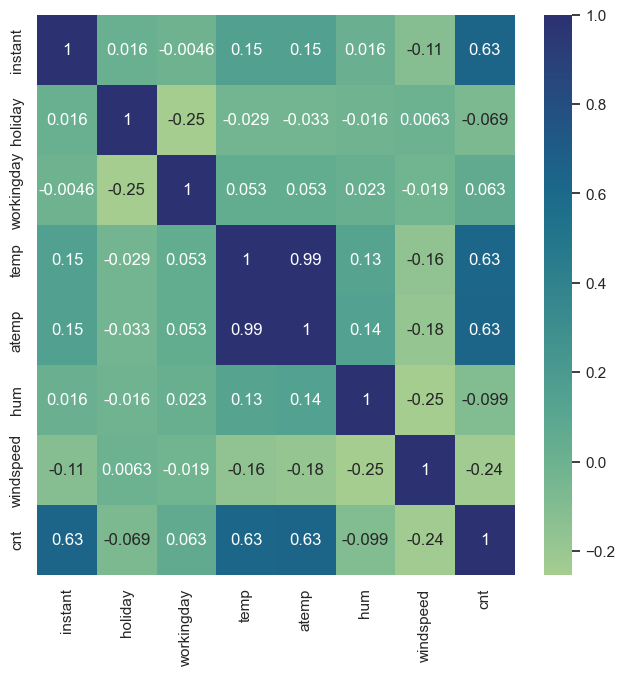

In [576]:
sns.set(rc={'figure.figsize':(7.7,7.27)})
sns.heatmap(bike_rent_dt.corr(),cmap="crest", annot=True)

There seems to a relationship between the atemp and the temp variable will decide which to choose according to the VIF and the p-value

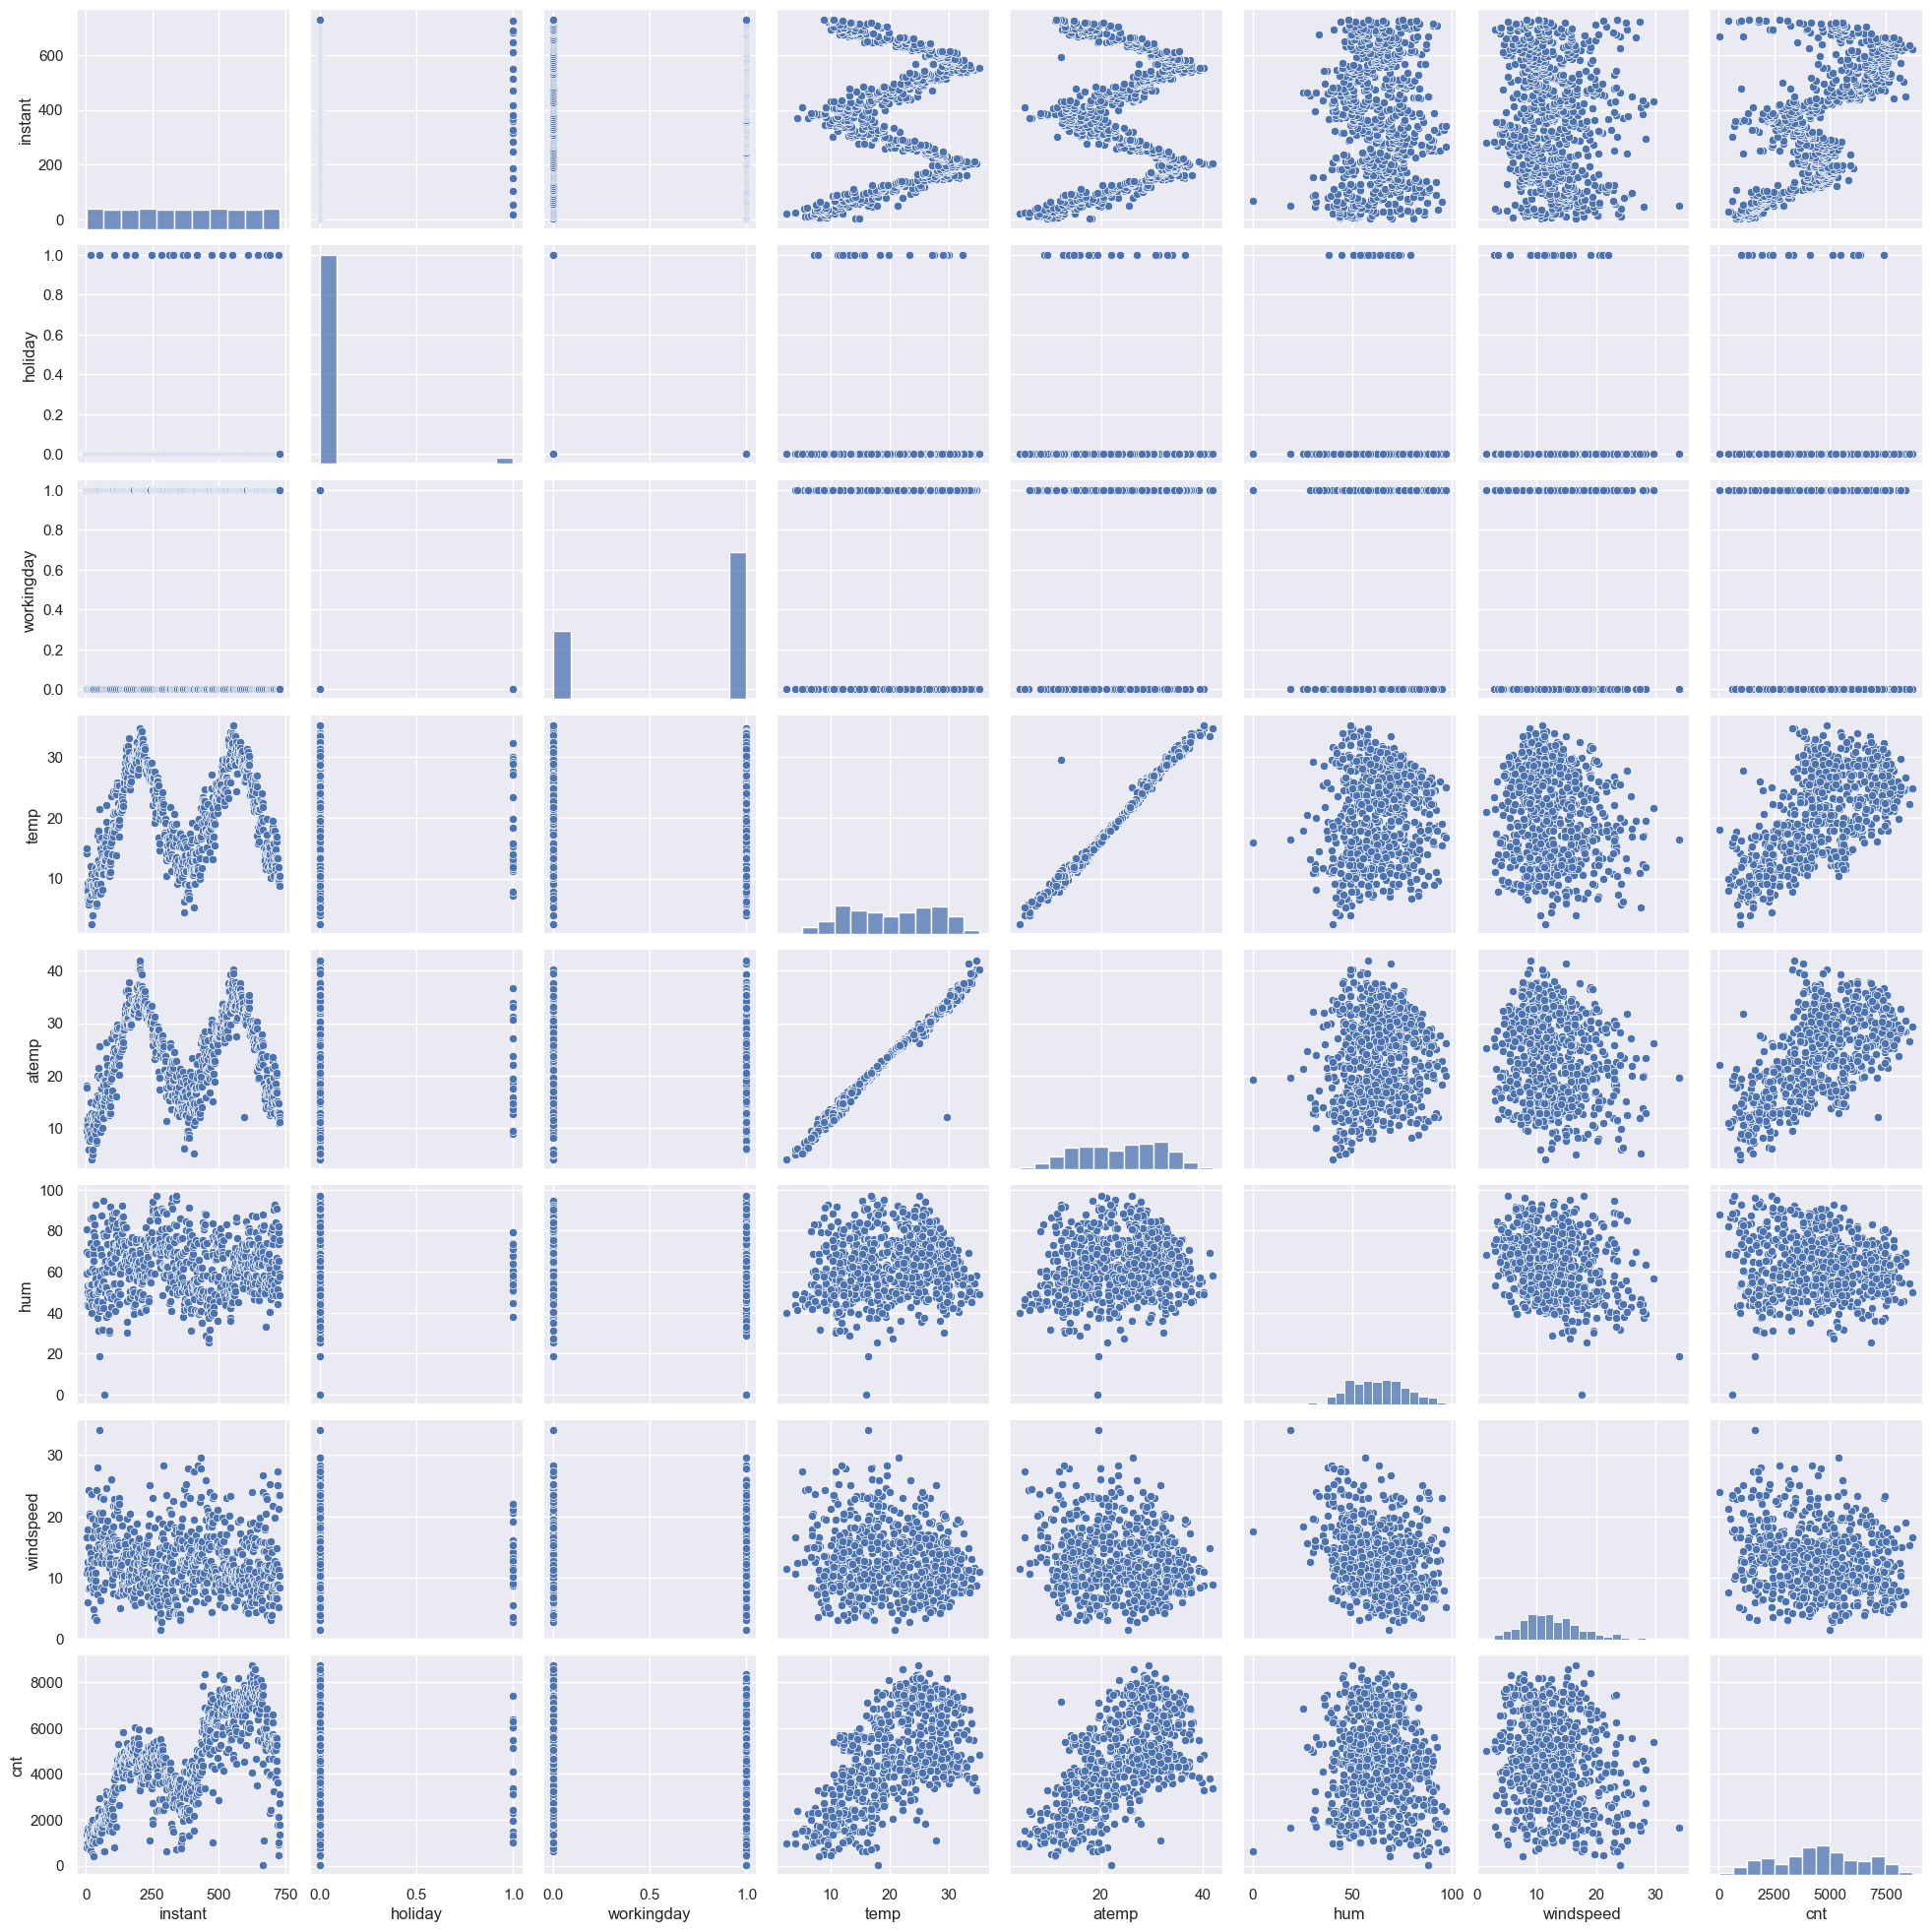

In [577]:
sns.pairplot(bike_rent_dt)

We see some varibales like atemp and temp having some corealation between each other which we can choose to delete one of them according to VIF or p-value in the upcoming stages

### Data preparation for linear regression

#### Converting data for model Building

In [578]:
bike_rent_dt.yr = bike_rent_dt.yr.map({'2018':0, '2019':1})

#### Generating dummy rows for the dataset

In [579]:
bike_rent_dummy_dt = bike_rent_dt[['weekday','weathersit','season','mnth']]
bike_rent_dummy_dt = pd.get_dummies(bike_rent_dummy_dt,drop_first=True)

#### Concatinating and deleting old rows

In [580]:
bike_rent_dt = pd.concat([bike_rent_dummy_dt,bike_rent_dt],axis = 1)
bike_rent_dt.drop(['weekday','weathersit','season','mnth'],axis=1,inplace=True)

#### Spliting into train and test datasets 

In [581]:
np.random.seed(1)
bike_rent_train_df, bike_rent_test_df = train_test_split(bike_rent_dt, train_size = 0.7, random_state = 100)

#### Scaling the dataset numerical values between 0 and 1 using min max scaler

In [582]:
scaler = MinMaxScaler()
sacling_vars = ['temp','atemp','hum','windspeed','cnt']
bike_rent_train_df[sacling_vars] = scaler.fit_transform(bike_rent_train_df[sacling_vars])

Here we see that the values have been scaled 

In [583]:
bike_rent_train_df.describe()

,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light_Snow,weathersit_Misty_Cloudy,season_spring,season_summer,...,mnth_Sep,instant,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098,0.243137,0.247059,...,0.080392,368.680392,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499
std,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867,0.429398,0.431725,...,0.272166,209.596164,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,187.250000,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,373.000000,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,552.750000,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,729.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Now we see that max and min of all lies between 0 and 1 hence have been nicely scaled

In [584]:
bike_rent_train_df.head()

,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light_Snow,weathersit_Misty_Cloudy,season_spring,season_summer,...,mnth_Sep,instant,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
576,0,0,0,0,1,0,0,0,0,0,...,0,577,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658
426,0,1,0,0,0,0,0,1,1,0,...,0,427,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255
728,0,0,1,0,0,0,0,0,1,0,...,0,729,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096
482,0,1,0,0,0,0,0,1,0,1,...,0,483,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973
111,0,0,0,0,0,0,0,1,0,1,...,0,112,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095


#### Creating Training and test dataframes

In [585]:
y_train = bike_rent_train_df.pop('cnt')
X_train = bike_rent_train_df

In [586]:
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

In [587]:
X_train

,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light_Snow,weathersit_Misty_Cloudy,season_spring,season_summer,...,mnth_Oct,mnth_Sep,instant,yr,holiday,workingday,temp,atemp,hum,windspeed
576,0,0,0,0,1,0,0,0,0,0,...,0,0,577,1,0,1,0.815169,0.766351,0.725633,0.264686
426,0,1,0,0,0,0,0,1,1,0,...,0,0,427,1,0,0,0.442393,0.438975,0.640189,0.255342
728,0,0,1,0,0,0,0,0,1,0,...,0,0,729,1,0,0,0.245101,0.200348,0.498067,0.663106
482,0,1,0,0,0,0,0,1,0,1,...,0,0,483,1,0,0,0.395666,0.391735,0.504508,0.188475
111,0,0,0,0,0,0,0,1,0,1,...,0,0,112,0,0,1,0.345824,0.318819,0.751824,0.380981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,0,0,0,1,0,0,0,0,0,0,...,0,0,579,1,0,1,0.863973,0.824359,0.679690,0.187140
53,0,0,0,0,0,1,0,0,1,0,...,0,0,54,0,0,1,0.202618,0.218747,0.435939,0.111379
350,0,1,0,0,0,0,0,1,0,0,...,0,0,351,0,0,0,0.248216,0.223544,0.577930,0.431816
79,1,0,0,0,0,0,0,1,0,1,...,0,0,80,0,0,1,0.462664,0.434043,0.759870,0.529881


### Feature Selection 

#### Using RFE for selecting top 15 features from the dataset

In [588]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [589]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('weekday_Mon', False, 10),
 ('weekday_Sat', True, 1),
 ('weekday_Sun', True, 1),
 ('weekday_Thu', False, 11),
 ('weekday_Tue', False, 8),
 ('weekday_Wed', False, 13),
 ('weathersit_Light_Snow', True, 1),
 ('weathersit_Misty_Cloudy', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_Aug', False, 12),
 ('mnth_Dec', False, 4),
 ('mnth_Feb', False, 5),
 ('mnth_Jan', False, 2),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 7),
 ('mnth_Mar', False, 9),
 ('mnth_May', False, 15),
 ('mnth_Nov', False, 3),
 ('mnth_Oct', False, 14),
 ('mnth_Sep', True, 1),
 ('instant', False, 16),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1)]

In [590]:
columns = X_train.columns[rfe.support_]
columns

Index(['weekday_Sat', 'weekday_Sun', 'weathersit_Light_Snow',
       'weathersit_Misty_Cloudy', 'season_spring', 'season_summer',
       'season_winter', 'mnth_Jul', 'mnth_Sep', 'yr', 'holiday', 'workingday',
       'temp', 'hum', 'windspeed'],
      dtype='object')

In [591]:
X_train.columns[~rfe.support_]

Index(['weekday_Mon', 'weekday_Thu', 'weekday_Tue', 'weekday_Wed', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jun', 'mnth_Mar', 'mnth_May',
       'mnth_Nov', 'mnth_Oct', 'instant', 'atemp'],
      dtype='object')

In [592]:

X_train_rfe = X_train[columns]
X_train_lm.head()

,const,weekday_Sat,weekday_Sun,weathersit_Light_Snow,weathersit_Misty_Cloudy,season_spring,season_summer,season_winter,mnth_Jul,mnth_Sep,yr,holiday,workingday,temp,hum,windspeed
576,1.0,0,0,0,0,0,0,0,1,0,1,0,1,0.815169,0.725633,0.264686
426,1.0,1,0,0,1,1,0,0,0,0,1,0,0,0.442393,0.640189,0.255342
728,1.0,0,1,0,0,1,0,0,0,0,1,0,0,0.245101,0.498067,0.663106
482,1.0,1,0,0,1,0,1,0,0,0,1,0,0,0.395666,0.504508,0.188475
111,1.0,0,0,0,1,0,1,0,0,0,0,0,1,0.345824,0.751824,0.380981


### Model Building 

#### Model 1

In [593]:
X_train_mlr = sm.add_constant(X_train_rfe)
mlr_1 = sm.OLS(y_train, X_train_mlr).fit()
mlr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          2.11e-191
Time:                        01:27:11   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.1995      0.028      7.200      0.000       0.145       0.254
weekday_Sat                 0.0937      0.012      8.040      0.000       0.071       0.117
weekday_Sun                 0.0406      0.012      3.315      0.001       0.017       0.065
weathersit_Light_Snow      -0.2450      0.026     -9.395      0.000      -0.296      -0.194
weathersit_Misty_Cloudy    -0.0563      0.010     -5.425      0.000      -0.077      -0.036
season_spring              -0.0555      0.021     -2.698      0.007      -0.096      -0.015
season_summer               0.0537      0.015      3.631      0.000       0.025       0.083
season_winter               0.0992      0.017      5.815      0.000       0.066       0.133
mnth_Jul                   -0.0546      0.018     -3.019      0.003      -0.090      -0.019
mnth_Sep                    0.0820      0.017      4.966      0.000       0.050       0.114
yr                          0.2298      0.008     28.647      0.000       0.214       0.246
holiday                    -0.0184      0.021     -0.867      0.386      -0.060       0.023
workingday                  0.0837      0.010      8.665      0.000       0.065       0.103
temp                        0.5277      0.033     15.884      0.000       0.462       0.593
hum                        -0.1611      0.037     -4.313      0.000      -0.234      -0.088
windspeed                  -0.1809      0.025     -7.118      0.000      -0.231      -0.131
==============================================================================
Omnibus:                       64.769   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.630
Skew:                          -0.663   Prob(JB):                     9.73e-35
Kurtosis:                       5.369   Cond. No.                     2.45e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.52e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Calculating the VIF for further feature elimination

In [594]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [round(variance_inflation_factor(X_train_rfe.values, i), 2) for i in range(X_train_rfe.shape[1])]

vif.sort_values(by = 'VIF', ascending=False)

,Features,VIF
11,workingday,50.68
0,weekday_Sat,12.20
1,weekday_Sun,11.79
4,season_spring,5.02
12,temp,3.62
6,season_winter,3.49
10,holiday,2.91
5,season_summer,2.62
13,hum,1.91
3,weathersit_Misty_Cloudy,1.57


In [595]:
X_train_rfe = X_train_rfe.drop(['workingday'], axis=1)

##### Here we see that workingday has a very high variance removing the same and creating new model

#### Model 2

In [596]:
X_train_mlr2 = sm.add_constant(X_train_rfe)
mlr_2 = sm.OLS(y_train, X_train_mlr2).fit()
mlr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          2.11e-191
Time:                        01:27:11   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.2832      0.034      8.300      0.000       0.216       0.350
weekday_Sat                 0.0100      0.011      0.897      0.370      -0.012       0.032
weekday_Sun                -0.0430      0.012     -3.725      0.000      -0.066      -0.020
weathersit_Light_Snow      -0.2450      0.026     -9.395      0.000      -0.296      -0.194
weathersit_Misty_Cloudy    -0.0563      0.010     -5.425      0.000      -0.077      -0.036
season_spring              -0.0555      0.021     -2.698      0.007      -0.096      -0.015
season_summer               0.0537      0.015      3.631      0.000       0.025       0.083
season_winter               0.0992      0.017      5.815      0.000       0.066       0.133
mnth_Jul                   -0.0546      0.018     -3.019      0.003      -0.090      -0.019
mnth_Sep                    0.0820      0.017      4.966      0.000       0.050       0.114
yr                          0.2298      0.008     28.647      0.000       0.214       0.246
holiday                    -0.1021      0.025     -4.024      0.000      -0.152      -0.052
temp                        0.5277      0.033     15.884      0.000       0.462       0.593
hum                        -0.1611      0.037     -4.313      0.000      -0.234      -0.088
windspeed                  -0.1809      0.025     -7.118      0.000      -0.231      -0.131
==============================================================================
Omnibus:                       64.769   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.630
Skew:                          -0.663   Prob(JB):                     9.73e-35
Kurtosis:                       5.369   Cond. No.                         19.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [597]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [round(variance_inflation_factor(X_train_rfe.values, i), 2) for i in range(X_train_rfe.shape[1])]

vif.sort_values(by = 'VIF', ascending=False)

,Features,VIF
12,hum,28.25
11,temp,16.06
13,windspeed,4.68
4,season_spring,4.03
6,season_winter,3.36
5,season_summer,2.79
3,weathersit_Misty_Cloudy,2.30
9,yr,2.08
7,mnth_Jul,1.59
8,mnth_Sep,1.39


Here we see that hum ie humidity has a large number of VIF which is greater than 5 hence removing it 

In [598]:
X_train_rfe = X_train_rfe.drop(['hum'], axis=1)

### Model 3

In [599]:
X_train_mlr3 = sm.add_constant(X_train_rfe)
mlr_3 = sm.OLS(y_train, X_train_mlr3).fit()
mlr_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.2
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          1.28e-188
Time:                        01:27:11   Log-Likelihood:                 508.20
No. Observations:                 510   AIC:                            -988.4
Df Residuals:                     496   BIC:                            -929.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.2037      0.029      6.972      0.000       0.146       0.261
weekday_Sat                 0.0118      0.011      1.037      0.300      -0.011       0.034
weekday_Sun                -0.0461      0.012     -3.931      0.000      -0.069      -0.023
weathersit_Light_Snow      -0.2895      0.024    -11.880      0.000      -0.337      -0.242
weathersit_Misty_Cloudy    -0.0822      0.009     -9.514      0.000      -0.099      -0.065
season_spring              -0.0655      0.021     -3.147      0.002      -0.106      -0.025
season_summer               0.0477      0.015      3.180      0.002       0.018       0.077
season_winter               0.0846      0.017      4.971      0.000       0.051       0.118
mnth_Jul                   -0.0496      0.018     -2.702      0.007      -0.086      -0.014
mnth_Sep                    0.0759      0.017      4.537      0.000       0.043       0.109
yr                          0.2337      0.008     28.828      0.000       0.218       0.250
holiday                    -0.1029      0.026     -3.983      0.000      -0.154      -0.052
temp                        0.4915      0.033     15.027      0.000       0.427       0.556
windspeed                  -0.1491      0.025     -6.024      0.000      -0.198      -0.100
==============================================================================
Omnibus:                       66.828   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              162.148
Skew:                          -0.682   Prob(JB):                     6.17e-36
Kurtosis:                       5.402   Cond. No.                         17.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [600]:
X_train_rfe = X_train_rfe.drop(['weekday_Sat'], axis=1)

In [601]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [round(variance_inflation_factor(X_train_rfe.values, i), 2) for i in range(X_train_rfe.shape[1])]

vif.sort_values(by = 'VIF', ascending=False)

,Features,VIF
10,temp,5.14
11,windspeed,4.60
4,season_summer,2.24
3,season_spring,2.11
8,yr,2.07
5,season_winter,1.81
6,mnth_Jul,1.59
2,weathersit_Misty_Cloudy,1.56
7,mnth_Sep,1.34
0,weekday_Sun,1.18


### Model 4

In [602]:
X_train_mlr4 = sm.add_constant(X_train_rfe)
mlr_4 = sm.OLS(y_train, X_train_mlr4).fit()
mlr_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     218.9
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          1.45e-189
Time:                        01:27:12   Log-Likelihood:                 507.65
No. Observations:                 510   AIC:                            -989.3
Df Residuals:                     497   BIC:                            -934.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.2060      0.029      7.074      0.000       0.149       0.263
weekday_Sun                -0.0483      0.012     -4.191      0.000      -0.071      -0.026
weathersit_Light_Snow      -0.2895      0.024    -11.878      0.000      -0.337      -0.242
weathersit_Misty_Cloudy    -0.0822      0.009     -9.517      0.000      -0.099      -0.065
season_spring              -0.0655      0.021     -3.147      0.002      -0.106      -0.025
season_summer               0.0475      0.015      3.171      0.002       0.018       0.077
season_winter               0.0848      0.017      4.984      0.000       0.051       0.118
mnth_Jul                   -0.0492      0.018     -2.680      0.008      -0.085      -0.013
mnth_Sep                    0.0760      0.017      4.541      0.000       0.043       0.109
yr                          0.2335      0.008     28.807      0.000       0.218       0.249
holiday                    -0.1052      0.026     -4.089      0.000      -0.156      -0.055
temp                        0.4907      0.033     15.004      0.000       0.426       0.555
windspeed                  -0.1479      0.025     -5.981      0.000      -0.196      -0.099
==============================================================================
Omnibus:                       63.016   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              158.263
Skew:                          -0.633   Prob(JB):                     4.30e-35
Kurtosis:                       5.417   Cond. No.                         17.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [603]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [round(variance_inflation_factor(X_train_rfe.values, i), 2) for i in range(X_train_rfe.shape[1])]

vif.sort_values(by = 'VIF', ascending=False)

,Features,VIF
10,temp,5.14
11,windspeed,4.60
4,season_summer,2.24
3,season_spring,2.11
8,yr,2.07
5,season_winter,1.81
6,mnth_Jul,1.59
2,weathersit_Misty_Cloudy,1.56
7,mnth_Sep,1.34
0,weekday_Sun,1.18


Now the VIF and the p-values looks inside the acceptable range hence selecting model 4

###  Residual Analysis of the train data

In [604]:
y_train_pred = mlr_4.predict(X_train_mlr4)

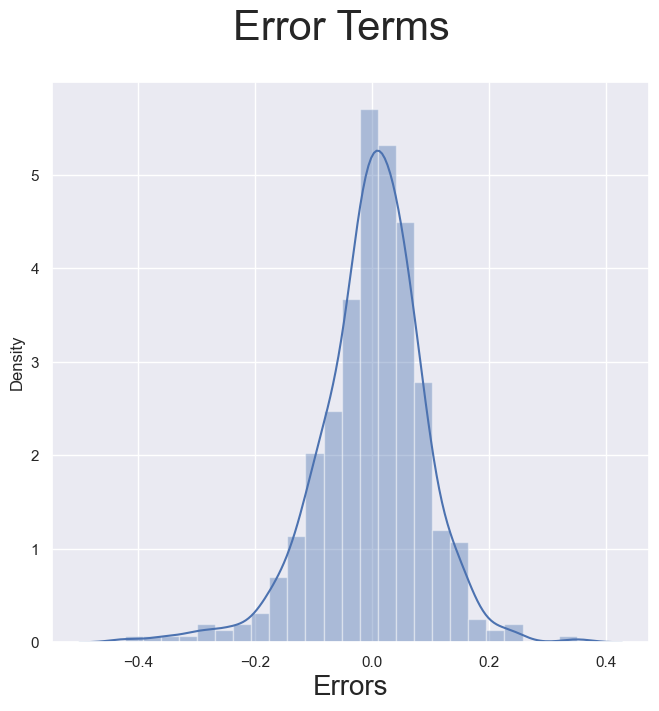

In [605]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 25)
fig.suptitle('Error Terms', fontsize = 30)  
plt.xlabel('Errors', fontsize = 20)  
plt.show()

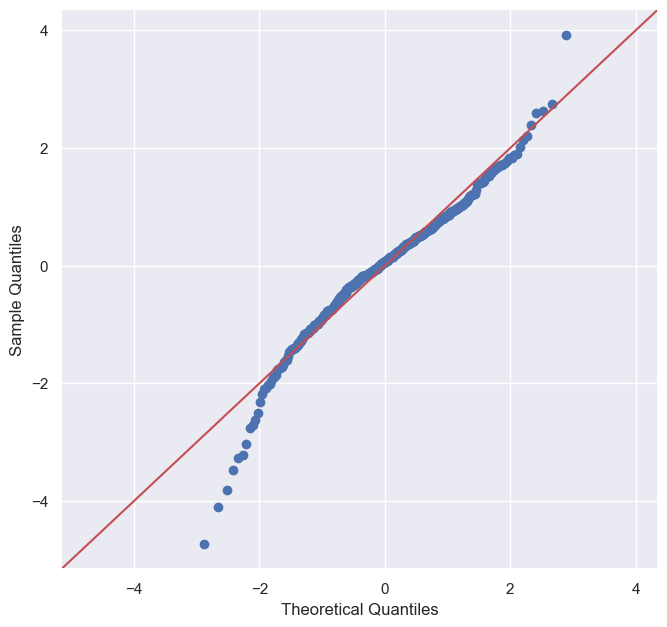

In [606]:
sm.qqplot((y_train - y_train_pred), fit=True, line='45')
plt.show()

Hence the error terms are uniformely distributed and also R-square explains more than 84% of the data 

### Utilizing the Final Model for Prediction

Applying the scaling on the test sets

In [607]:
bike_rent_test_df.head()

,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light_Snow,weathersit_Misty_Cloudy,season_spring,season_summer,...,mnth_Sep,instant,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
184,1,0,0,0,0,0,0,1,0,0,...,0,185,0,1,0,29.793347,33.27085,63.7917,5.459106,6043
535,0,0,0,0,0,1,0,0,0,1,...,0,536,1,0,1,32.082500,36.04875,59.2083,7.625404,6211
299,0,0,0,1,0,0,0,1,0,0,...,0,300,0,0,1,19.270000,22.85230,81.2917,13.250121,2659
221,0,0,0,0,0,1,0,0,0,0,...,0,222,0,0,1,31.433347,34.24915,42.4167,13.417286,4780
152,0,0,0,1,0,0,0,0,0,1,...,0,153,0,0,1,29.315000,32.19710,30.5000,19.583229,4968


In [608]:
test_scaling_vars = ['temp','atemp','hum','windspeed','cnt']

bike_rent_test_df[test_scaling_vars] = scaler.transform(bike_rent_test_df[test_scaling_vars])

In [609]:
bike_rent_test_df.describe()

,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light_Snow,weathersit_Misty_Cloudy,season_spring,season_summer,...,mnth_Sep,instant,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.127273,0.118182,0.145455,0.163636,0.168182,0.100000,0.027273,0.318182,0.254545,0.263636,...,0.086364,358.127273,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154
std,0.334038,0.323559,0.353363,0.370789,0.374881,0.300684,0.163248,0.466833,0.436599,0.441609,...,0.281541,214.116582,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,4.000000,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,171.500000,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,350.500000,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,539.750000,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,730.000000,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300


In [610]:
y_test = bike_rent_test_df.pop('cnt')
X_test = bike_rent_test_df

In [611]:
X_test = sm.add_constant(X_test[X_train_rfe.columns])
y_test_pred = mlr_4.predict(X_test)

In [612]:
from sklearn.metrics import r2_score
print('R2_score of training data', r2_score(y_train, y_train_pred))
print('R2_score of test data', r2_score(y_test, y_test_pred))

R2_score of training data 0.8409034711793522
R2_score of test data 0.8079646332676632


### Step 9: Model Evaluation

Text(0.5, 0.98, 'y_test vs y_pred')

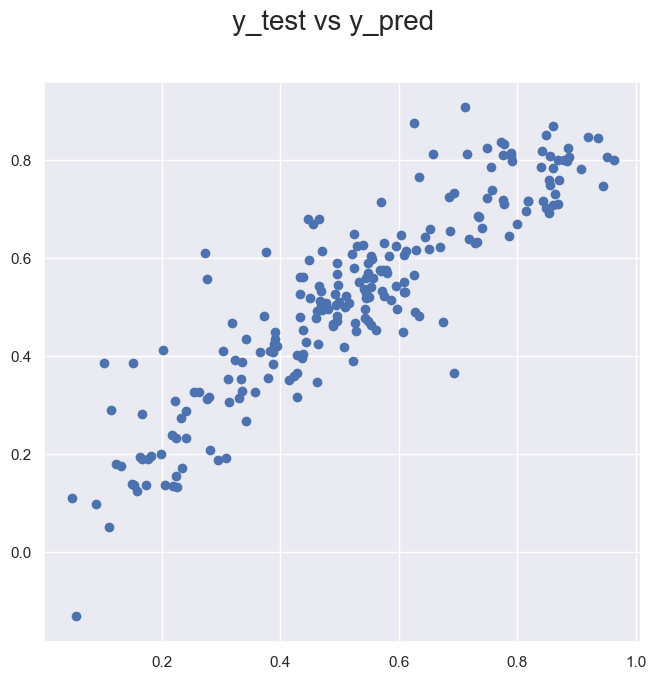

In [613]:
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 

In [614]:
param = pd.DataFrame(lm_2.params)
param.insert(0,'Variables',param.index)
param.rename(columns = {0:'Coefficient value'},inplace = True)
param['index'] = list(range(0,13))
param.set_index('index',inplace = True)
param.sort_values(by = 'Coefficient value',ascending = False,inplace = True)
param

,Variables,Coefficient value
index,,
11,temp,0.490684
9,yr,0.233472
0,const,0.206034
3,season_winter,0.084806
5,mnth_Sep,0.076013
2,season_summer,0.047536
6,weekday_Sun,-0.048345
4,mnth_Jul,-0.049235
1,season_spring,-0.065521


## Final Conclusions

Equation for the best fitted line is as follows 

### $ cnt = 0.490684 * temp +
      0.233472 * yr +
      0.206034 * const +
      0.084806 * season_winter +
      0.076013 * mnth_Sep +
      0.047536 * season_summer +
     -0.048345 * weekday_Sun +
     -0.049235 * mnth_Jul +
     -0.065521 * season_spring +
     -0.082198 * weathersit_Misty_Cloudy +
     -0.105201 * holiday +
     -0.147854 * windspeed +
     -0.289492 * weathersit_Light_Snow $


### From the above we can infer that 

##### * All variables containing the +ve coffecients like temp , yr, season summer , value of cnt increases as the value of vars increases 

##### * All variables containing the -ve coffecients like windspeed, weekday_Sun,holiday  value of cnt decreases as the value of vars increases 

##### * Based on the R-Squared and Adjusted R-Squared values for both the training and testing datasets, it can be inferred that these variables effectively account for more than 81% of the variation in bike demand

### Addtional Information for the company based on the univariate and bivariate analysis

##### * Most of the data in the dataset is uniformaly distributed ie contains no major outliers 

##### *The company should prioritize the months of January, July, September, November, and December due to their notably higher demand compared to other months.

##### * During holidays, biking appears to be less appealing. Implementing additional motivation and marketing strategies could potentially enhance interest and demand during these times.

##### * Preparing for the winter season is crucial, as the demand experiences a notable surge during this period.